In [1]:
# Importing all necessary modules and functions for the project

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import acquire
import prepare

In [2]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
train, validate, test = prepare.prep_telco_data(telco)

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [14]:
# Isna will confirm that I do not have 

train.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [5]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,1,0,0
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,1,1,0,0,0,0,1,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0


In [15]:
# Isna will confirm that I do not have 

validate.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [6]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Isna will confirm that Ido not have 

test.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

# Exploration

There are no nulls in my train, validate, and test datasets

In [21]:
train.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'binned_tenure_2years',
 'binned_tenure_3years',
 'binned_tenure_4years',
 'binned_tenure_5years',
 'binned_tenure_6years',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 's

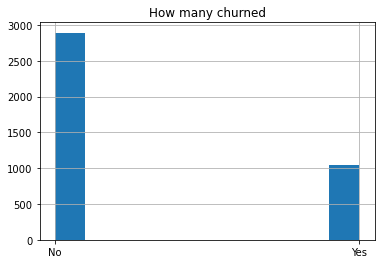

In [19]:
plt.title('How many churned')
train.churn.hist()
plt.show()

In [22]:
# To get the churn percentage
train.churn_encoded.mean()

0.2656845313690627

**And also what columns have the most uneven distribution of their population** (Univariate exploration)

    - Categorical data

In [ ]:
plt.hist(telco['gender'], color='orange')
plt.show()

In [ ]:
telco.gender.value_counts(normalize=True)*100

In [ ]:
plt.hist(telco['senior_citizen'], color='beige')
plt.show()

In [ ]:
plt.hist(telco['partner'], color='beige')
plt.show()

In [ ]:
plt.hist(telco['dependents'], color='purple')
plt.show()

In [ ]:
plt.hist(telco['tenure'], color='lightgreen')
plt.show()

In [ ]:
plt.hist(telco['phone_service'], color='red')
plt.show()

In [ ]:
plt.hist(telco['multiple_lines'], color='blue')
plt.show()

In [ ]:
plt.hist(telco['online_security'], color='green')
plt.show()

In [ ]:
plt.hist(telco['online_backup'], color='beige')
plt.show()

In [ ]:
plt.hist(telco['device_protection'], color='orange')
plt.show()

In [ ]:
plt.hist(telco['tech_support'], color='tan')
plt.show()

In [ ]:
plt.hist(telco['streaming_tv'], color='purple')
plt.show()

In [ ]:
plt.hist(telco['streaming_movies'], color='red')
plt.show()

In [ ]:
plt.hist(telco['paperless_billing'], color='blue')
plt.show()

In [ ]:
plt.hist(telco['contract_type'], color='lightblue')
plt.show()

In [ ]:
plt.hist(telco['internet_service_type'], color='green')
plt.show()

In [ ]:
plt.hist(telco['payment_type'], color='tan')
plt.show()

In [ ]:
plt.hist(telco['binned_tenure'], color='lightblue')
plt.show()

    - Numerical data

In [ ]:
plt.hist(telco['monthly_charges'], color='turquoise')
plt.show()

In [ ]:
plt.hist(telco['total_charges'], color='tan')
plt.show()

In [ ]:
plt.hist(telco['payment_type'], color='grey', )
plt.xticks([0, 1, 2, 3], ['Mailed\ncheck', 'Electronic\ncheck ', 'Credit card\n(automatic)', 'Bank transfer\n(automatic)'])
plt.show()

In [ ]:
telco.payment_type.value_counts(normalize=True)*100

In [ ]:
plt.hist(telco['tenure'], color='brown')
plt.show()

Except for gender and partner, the rest of the columns have a pretty uneven distribution of their population.
Some of the most important unevened ones are:
    - 
    - 
    - 

The big question now would be: who is churning?

In [ ]:
for col in train:
    drop

In [ ]:
for column in train:
    train.drop(columns=['churn','tenure', 'gender', \
     'total_charges', 'monthly_charges','contract_type_id', \
     'payment_type_id', 'internet_service_type_id', \
     'contract_type_id','phone_service','streaming_movies', \
     'streaming_tv','multiple_lines'])):
    plt.figure(i)
    sns.countplot(data=telco, x=predictor, hue='churn')

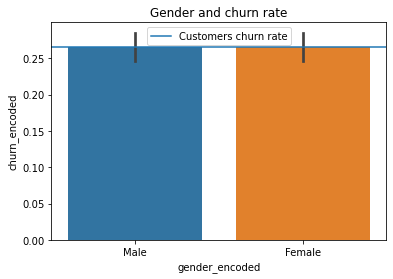

In [29]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

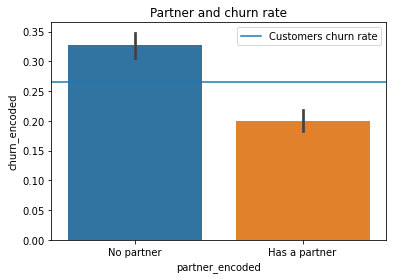

In [30]:
plt.title('Partner and churn rate')
sns.barplot(x='partner_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['No partner', 'Has a partner'])
plt.legend()
plt.show()

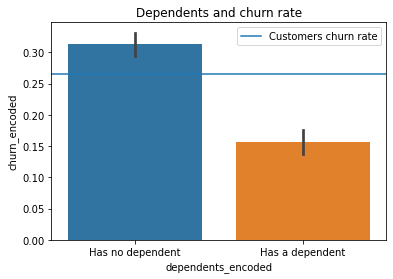

In [31]:
plt.title('Dependents and churn rate')
sns.barplot(x='dependents_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Has no dependent', 'Has a dependent'])
plt.legend()
plt.show()

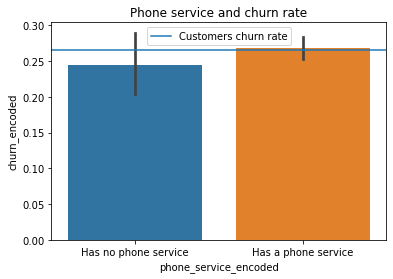

In [32]:
plt.title('Phone service and churn rate')
sns.barplot(x='phone_service_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Has no phone service', 'Has a phone service'])
plt.legend()
plt.show()

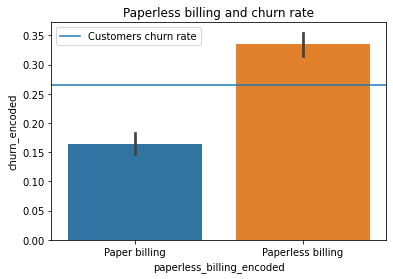

In [33]:
plt.title('Paperless billing and churn rate')
sns.barplot(x='paperless_billing_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Paper billing', 'Paperless billing'])
plt.legend()
plt.show()

In [39]:
telco.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

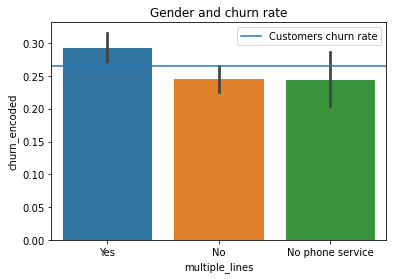

In [45]:
plt.title('Gender and churn rate')
sns.barplot(x='multiple_lines', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.legend()
plt.show()

In [43]:
telco.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

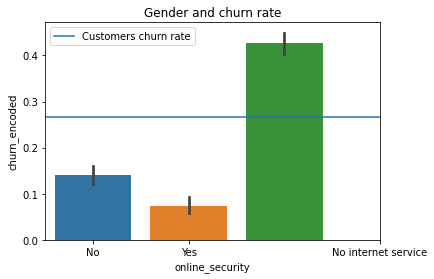

In [44]:
plt.title('Online security and churn rate')
sns.barplot(x='online_security', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1, 3], ['No', 'Yes', 'No internet service'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()

In [ ]:
plt.title('Gender and churn rate')
sns.barplot(x='gender_encoded', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()
plt.show()